In [ ]:
# Measures of Central Tendency:
#- Mean -> Sum of all values divided by the number of values
#- Trimmed mean -> is an average computed after discarding a certain percentage of the highest and 
#    lowest values to reduce the effect of outliers.
#- Weighted Mean -> The sum of all values times the weight divided by the sum of the weight
#- Median -> The value such that one half of the data lies above and below
#- Weighted Median -> The value such that one half of the sum of the weights lies above and below the sorted data
#- Percentile -> The value such that P percent of the data lies below
#- Quartile -> Quartiles are a set of three points that divide a dataset into four equal parts, each containing 25% of the data.
#- Mode -> The mode is the value that appears most frequently in a data set.

In [2]:
# import libraries
import numpy as np
import pandas as pd


In [2]:
# Creating a dummy DataFrame
df = pd.DataFrame({
    'State':['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh',
              'Tamil Nadu', 'Rajasthan', 'Karnataka', 'Gujarat', 'Goa'],
    'Population':[200000000, 112374333, 104099452, 91276115, 72626809,
                   72147030, 68548437, 61095297, 60439692, 41974218],
    'Murder Rate':[2.5, 1.8, 3.2, 2.9, 2.7, 1.6, 2.0, 2.1, 1.9, 10.0]
})
df


,State,Population,Murder Rate
0,Uttar Pradesh,200000000,2.5
1,Maharashtra,112374333,1.8
2,Bihar,104099452,3.2
3,West Bengal,91276115,2.9
4,Madhya Pradesh,72626809,2.7
5,Tamil Nadu,72147030,1.6
6,Rajasthan,68548437,2.0
7,Karnataka,61095297,2.1
8,Gujarat,60439692,1.9
9,Goa,41974218,10.0


In [6]:
df.describe()

,Population,Murder Rate
count,1.000000e+01,10.00000
mean,8.845814e+07,3.07000
std,4.456426e+07,2.48911
min,4.197422e+07,1.60000
25%,6.295858e+07,1.92500
50%,7.238692e+07,2.30000
75%,1.008936e+08,2.85000
max,2.000000e+08,10.00000


In [8]:
df['Murder Rate'].describe()

count    10.00000
mean      3.07000
std       2.48911
min       1.60000
25%       1.92500
50%       2.30000
75%       2.85000
max      10.00000
Name: Murder Rate, dtype: float64

In [11]:
df.describe(include='all')

,State,Population,Murder Rate
count,10,1.000000e+01,10.00000
unique,10,NaN,NaN
top,Uttar Pradesh,NaN,NaN
freq,1,NaN,NaN
mean,NaN,8.845814e+07,3.07000
std,NaN,4.456426e+07,2.48911
min,NaN,4.197422e+07,1.60000
25%,NaN,6.295858e+07,1.92500
50%,NaN,7.238692e+07,2.30000
75%,NaN,1.008936e+08,2.85000


In [15]:
df.State.describe()

count                10
unique               10
top       Uttar Pradesh
freq                  1
Name: State, dtype: object

In [16]:
df.Population.describe()

count    1.000000e+01
mean     8.845814e+07
std      4.456426e+07
min      4.197422e+07
25%      6.295858e+07
50%      7.238692e+07
75%      1.008936e+08
max      2.000000e+08
Name: Population, dtype: float64

In [27]:
df.describe(exclude=[np.number])

,State
count,10
unique,10
top,Uttar Pradesh
freq,1


In [28]:
df.describe(include=[np.number])

,Population,Murder Rate
count,1.000000e+01,10.00000
mean,8.845814e+07,3.07000
std,4.456426e+07,2.48911
min,4.197422e+07,1.60000
25%,6.295858e+07,1.92500
50%,7.238692e+07,2.30000
75%,1.008936e+08,2.85000
max,2.000000e+08,10.00000


In [26]:
df.describe(exclude=[object])

,Population,Murder Rate
count,1.000000e+01,10.00000
mean,8.845814e+07,3.07000
std,4.456426e+07,2.48911
min,4.197422e+07,1.60000
25%,6.295858e+07,1.92500
50%,7.238692e+07,2.30000
75%,1.008936e+08,2.85000
max,2.000000e+08,10.00000


In [29]:
df.describe(include=[object])

,State
count,10
unique,10
top,Uttar Pradesh
freq,1


In [16]:
# Regular mean murder rate
regular_mean = df['Murder Rate'].mean()
print(f"Regular Mean Murder Rate:{regular_mean: .2f}")

Regular Mean Murder Rate: 3.07


In [ ]:
# Regular Mean: We simply add up all the murder rates and divide by the number of states. 
# This gives us a basic average but can be influenced by extreme values.

In [22]:
# Trimmed mean murder rate with 10% trim
#Trimmed Mean: To calculate the trimmed mean, we remove a certain percentage of the highest and lowest rates 
#before calculating the mean. 
#This helps to mitigate the effect of outliers or extreme values. 
#Here, we're using a 10% trim level, meaning we remove the top 10% and bottom 10% of values.
from scipy.stats import trim_mean
trimmed_mean_rate=trim_mean(df['Murder Rate'],0.1)
print(f"Trimmed Mean Murder Rate:{trimmed_mean_rate: .2f}")

Trimmed Mean Murder Rate: 2.39


In [23]:
# Weighted mean murder rate based on population

# Weighted Mean: The weighted mean takes into account the population of each state, 
#                 giving more weight to states with a higher population. 
# This is often more representative of the actual risk because it considers where more people are living.

weighted_mean_rate = np.average(df['Murder Rate'], weights=df['Population'])
print(f"Weighted Mean Murder Rate:{weighted_mean_rate: .2f}")

Weighted Mean Murder Rate: 2.73


In [28]:
# Calculating the median murder rate from our dataset to determine the central value of the dataset.

# Median is the value that falls in the middle of the dataset when it is ordered by size. 
# It's particularly useful when the data has outliers or is skewed 
# because it is not influenced by extremely large or small values.

median_murder_rate = df['Murder Rate'].median()
print(f"Median Murder Rate: {median_murder_rate:.2f}")

Median Murder Rate: 2.30


In [30]:
# Computing the weighted median of the murder rate 
def calculate_weighted_median(values, weights):
    sorted_data, sorted_weights = zip(*sorted(zip(values, weights)))
    cum_weights = np.cumsum(sorted_weights)
    median_idx = np.searchsorted(cum_weights, cum_weights[-1] / 2.0)
    return sorted_data[median_idx]
weighted_median_murder_rate = calculate_weighted_median(df['Murder Rate'], df['Population'])
print(f"Weighted Median Murder Rate: {weighted_median_murder_rate}")

Weighted Median Murder Rate: 2.5


In [48]:
sorted_data, sorted_weights = zip(*(zip(df['Murder Rate'], df['Population'])))
print(sorted_data)
print(sorted_weights)

(2.5, 1.8, 3.2, 2.9, 2.7, 1.6, 2.0, 2.1, 1.9, 10.0)
(200000000, 112374333, 104099452, 91276115, 72626809, 72147030, 68548437, 61095297, 60439692, 41974218)


In [51]:
sorted_data, sorted_weights = zip(*sorted(zip(df['Murder Rate'], df['Population'])))
print(sorted_data)
print(sorted_weights)
cum_weights = np.cumsum(sorted_weights)
print(cum_weights)

(1.6, 1.8, 1.9, 2.0, 2.1, 2.5, 2.7, 2.9, 3.2, 10.0)
(72147030, 112374333, 60439692, 68548437, 61095297, 200000000, 72626809, 91276115, 104099452, 41974218)
[ 72147030 184521363 244961055 313509492 374604789 574604789 647231598
 738507713 842607165 884581383]


In [57]:
np.searchsorted([1,2,3,4,5], 3)

2

In [59]:
median_idx = np.searchsorted(cum_weights, cum_weights[-1] / 2.0)
median_idx

5

In [60]:
c=cum_weights[-1] / 2.0
c

442290691.5

In [ ]:
# Extra explanation

#list1 = [1, 3, 2]
#list2 = ['a', 'b', 'c']

#zipped = zip(list1, list2)

#unzipped = list(zip(*zipped))
#print(unzipped)

# The zip() function in Python combines corresponding elements from multiple iterables into tuples, 
#  forming an iterator of these tuples.
# zip() is often used in combination with the * operator, which is known as the unpacking operator

In [9]:
list1 = [1, 3, 2]
list1

[1, 3, 2]

In [10]:
list2 = ['a', 'b', 'c']
list2

['a', 'b', 'c']

In [11]:
zipped = zip(list1, list2)
zipped
# zips the combined list into tuples

In [12]:
list(zipped)

[(1, 'a'), (3, 'b'), (2, 'c')]

In [42]:
unzipped = list(zip(*zipped))
print(unzipped)
#*in front will unzip and then zip it again into tuples in list

[(1, 3, 2), ('a', 'b', 'c')]


In [43]:
list1 = [1, 3, 2]
list2 = ['a', 'b', 'c']
unzipped = list(zip(*(zip(list1, list2))))
print(unzipped)

[(1, 3, 2), ('a', 'b', 'c')]


In [36]:
# Calculate 10th and 90th percentile
p10 = np.percentile(df['Murder Rate'],10)
p90 = np.percentile(df['Murder Rate'],90)

print(f"10th percentile (P10) of Murder Rate: {p10:.2f}")
print(f"90th percentile (P90) of Murder Rate: {p90:.2f}")

# Over 90% of the States had murder rate <3.88
#P10 and P90 provide insights into the lower and upper extremes of the data distribution respectively.

10th percentile (P10) of Murder Rate: 1.78
90th percentile (P90) of Murder Rate: 3.88


In [40]:
# Calculate the quartiles (Q1, Q2, Q3) for Murder Rate
# Quartiles help us understand the spread of the data by dividing the dataset into four equal parts. 
#  Q1 is the middle number between the smallest number and the median of the dataset, 
#  Q2 is the median itself, and Q3 is the middle value between the median and the highest value of the dataset.
Q1 = np.percentile(df['Murder Rate'],25) # First Quartile (25%)
Q2 = np.percentile(df['Murder Rate'],50) # Second Quartile (Median, 50%)
Q3 = np.percentile(df['Murder Rate'],75) # Third Quartile (75%)

print(f"First quartile (Q1) of Murder Rate:{Q1:.2f}")
print(f"Median (Q2) of Murder Rate:{Q2:.2f}")
print(f"Third quartile (Q1) of Murder Rate:{Q3:.2f}")


First quartile (Q1) of Murder Rate:1.92
Median (Q2) of Murder Rate:2.30
Third quartile (Q1) of Murder Rate:2.85


In [42]:
# Calculate the mode of the Murder Rate
mode_result = df['Murder Rate'].mode()

# Output the mode value and its count
print(f"Mode of Murder Rate: {mode_result}")

Mode of Murder Rate: 0     1.6
1     1.8
2     1.9
3     2.0
4     2.1
5     2.5
6     2.7
7     2.9
8     3.2
9    10.0
Name: Murder Rate, dtype: float64


In [ ]:
# The mode, while being a measure of central tendency like the mean and median, has its unique set of limitations and problems. 
# For nominal data (data that is categorized without a natural order), the mode can be the only measure of central tendency 
# that makes sense. 
# However, for interval or ratio data, other measures of central tendency, such as the mean or median, 
# often give more meaningful insights. 
# Datasets can have one mode (unimodal), more than one mode (bimodal or multimodal), or no mode at all. 
# This can sometimes complicate the interpretation, especially in a multimodal distribution, 
# as it isn't clear which mode is more representative of the data's central tendency.

In [ ]:
# Measures of Dispersion:

#- Deviation -> It is typically the deviation of each value from the mean.
#- Range -> The range is the difference between the maximum and minimum values.
#- Interquartile Range (IQR)-> IQR is the range between the first quartile (25th percentile) 
#   and the third quartile (75th percentile) ~ IQR = Q3-Q1
#- Variance -> Variance is the average of the squared deviations from the mean.
#- Standard Deviation -> Standard deviation is the square root of the variance
#- Mean Absolute Deviation -> Mean absolute deviation is the average of the absolute deviations from the mean

In [8]:
murder_mean=df['Murder Rate'].mean()
print(murder_mean)
df['Simple Deviation'] = df['Murder Rate']-murder_mean
df

3.0700000000000003


,State,Population,Murder Rate,Simple Deviation
0,Uttar Pradesh,200000000,2.5,-0.57
1,Maharashtra,112374333,1.8,-1.27
2,Bihar,104099452,3.2,0.13
3,West Bengal,91276115,2.9,-0.17
4,Madhya Pradesh,72626809,2.7,-0.37
5,Tamil Nadu,72147030,1.6,-1.47
6,Rajasthan,68548437,2.0,-1.07
7,Karnataka,61095297,2.1,-0.97
8,Gujarat,60439692,1.9,-1.17
9,Goa,41974218,10.0,6.93


In [31]:
#The range is the simplest measure of dispersion, calculated as 
#the difference between the maximum and minimum values in a data set.
#It gives a quick sense of the spread of the data but can be influenced greatly by outliers.
murder_range=df['Murder Rate'].max()-df['Murder Rate'].min()
murder_range

8.4

In [32]:
#The Interquartile Range is a measure of dispersion that represents the range within the middle 50% of the data. 
#It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) and is not affected by outliers.
# IQR

Q1 = df['Murder Rate'].quantile(0.25)
Q3 = df['Murder Rate'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.9250000000000003

In [33]:
#Variance measures how spread out a data set is. 
#It's the average of the squared deviations from the mean. 
#It provides a good overall impression of the spread of the data but is not in the same units as the data, 
#which can be confusing.

# Variance

df['Murder Rate'].var()

6.195666666666666

In [34]:
#The standard deviation is the square root of the variance and is in the same units as the data, 
#which makes it more interpretable. 
#It indicates the average amount by which the values in the data set deviate from the mean.

# SD

df['Murder Rate'].std()

2.4891096132285266

In [35]:
#Mean Absolute Deviation is the average of the absolute deviations from the mean. 
#It's a more intuitive measure of spread because it's in the same units as the data and 
#doesn't square the deviations, making it less sensitive to extreme values.
# Mean Abs Deviation

df['Murder Rate'].mad()

1.4120000000000001

In [ ]:
# Skewness

#Skewness is a crucial concept in statistics, providing insights into the symmetry and distribution of data. 
#It measure of the asymmetry of the probability distribution of a real-valued random variable. 
#The skewness value can be positive, zero, negative, or undefined.

#- Positive skew (Right skew): Indicates that the tail on the right side of the distribution is longer 
#    or fatter than the left side.
#    It suggests that there is a larger number of values exceeding the mean.
#- Negative skew (Left skew): Indicates that the tail on the left side of the distribution is longer 
#    or fatter than the right side. 
#   It shows that there is a larger number of values falling below the mean.

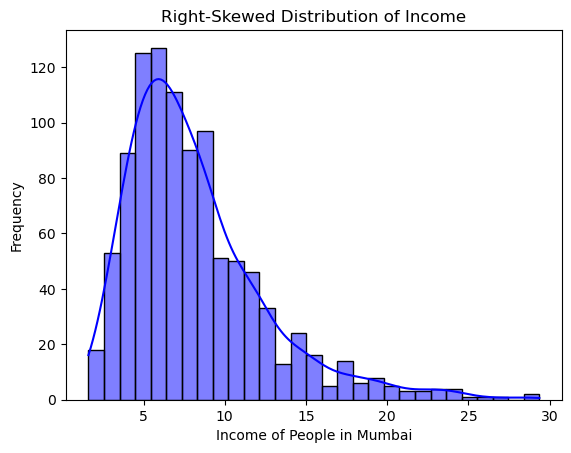

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Right Skewed

# Generate some data for the income of people that is right-skewed
np.random.seed(0)
income_data = np.random.lognormal(mean=2, sigma=0.5, size=1000)  # Lognormal distribution is right-skewed

# Plotting histogram with kde
sns.histplot(income_data, kde=True, color='blue')
plt.xlabel('Income of People in Mumbai')
plt.ylabel('Frequency')
plt.title('Right-Skewed Distribution of Income')
plt.show()


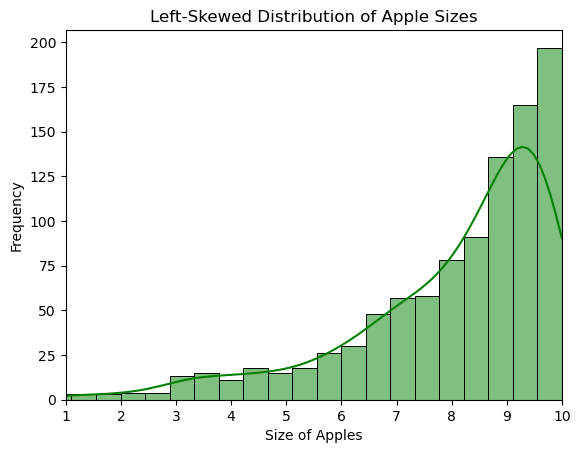

In [7]:
# Generate a right-skewed data set
right_skewed_data = np.random.exponential(scale=2, size=1000)

# Subtract the right-skewed data from a constant to create left-skewed data
left_skewed_data = 10 - right_skewed_data

# Plotting histogram with KDE
sns.histplot(left_skewed_data, kde=True, color='green')
plt.xlabel('Size of Apples')
plt.ylabel('Frequency')
plt.title('Left-Skewed Distribution of Apple Sizes')
plt.xlim(1, 10)
plt.show()